In [57]:
!pip install catboost

In [58]:
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
from matplotlib import pyplot as plt

In [131]:
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [130]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [63]:
df.shape

(1470, 35)

In [64]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [65]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [66]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


In [67]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


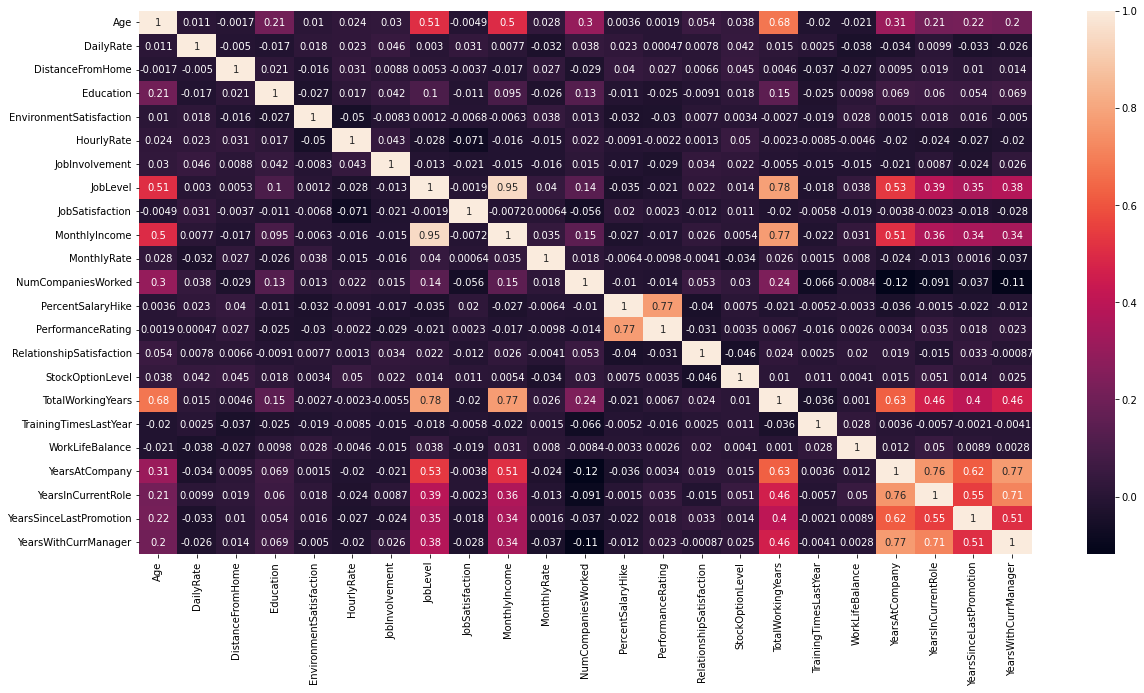

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [69]:
df.Attrition.replace(['Yes','No'],[1,0],inplace=True)
df.Gender.replace(['Male','Female'],[1,0],inplace=True)
df.OverTime.replace(['Yes','No'],[1,0],inplace=True)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,1,79,3,1,Laboratory Technician,4,Single,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,0,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,1,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,1,44,2,3,Manufacturing Director,3,Single,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,1,94,3,2,Healthcare Representative,3,Married,5237,16577,6,0,13,3,2,2,17,3,2,7,7,7,7


In [70]:
#Categorical Variable conversion
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [72]:
X = df.drop(['Attrition'],axis=1)
Y = df.Attrition

x_train, x_test, y_train, y_test = train_test_split(X ,Y ,test_size=0.2, random_state=1)

# **XGBoost Classifier**

In [132]:
model = XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [133]:
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)

In [142]:
model.fit(x_train,y_train)

XGBClassifier(learning_rate=0.16, max_depth=50, n_estimators=200, n_jobs=-1,
              verbose=1)

In [143]:
print(metrics.roc_auc_score(y_train,model.predict_proba(x_train)[:,1]),
                            metrics.roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))

1.0 0.8148743424897722


# **Lightboost Classifier**

In [138]:
lg = LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }

d_train = lgb.Dataset(x_train, label= y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

In [144]:
lgbClass = lgb.train(params, d_train)
print(metrics.roc_auc_score(y_train, lgbClass.predict(x_train)),
                            metrics.roc_auc_score(y_test, lgbClass.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.0 0.8317504383401519


# **Catboost Classifier**

In [99]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [101]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train, 
        cat_features= cat_features, 
        eval_set=(x_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [102]:
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    x_train, y_train,
    cat_features=cat_features,
    eval_set=(x_test, y_test),
)

Learning rate set to 0.244512
0:	learn: 0.5598668	test: 0.5748376	best: 0.5748376 (0)	total: 3.11ms	remaining: 28ms
1:	learn: 0.4766823	test: 0.5091886	best: 0.5091886 (1)	total: 8.21ms	remaining: 32.8ms
2:	learn: 0.4260369	test: 0.4663701	best: 0.4663701 (2)	total: 13.7ms	remaining: 31.9ms
3:	learn: 0.4103299	test: 0.4570920	best: 0.4570920 (3)	total: 15.2ms	remaining: 22.8ms
4:	learn: 0.3681876	test: 0.4265943	best: 0.4265943 (4)	total: 19.9ms	remaining: 19.9ms
5:	learn: 0.3479673	test: 0.4216985	best: 0.4216985 (5)	total: 25.4ms	remaining: 16.9ms
6:	learn: 0.3320238	test: 0.4154886	best: 0.4154886 (6)	total: 30.8ms	remaining: 13.2ms
7:	learn: 0.3181294	test: 0.4173390	best: 0.4154886 (6)	total: 35.9ms	remaining: 8.98ms
8:	learn: 0.3110289	test: 0.4183544	best: 0.4154886 (6)	total: 42ms	remaining: 4.67ms
9:	learn: 0.2985827	test: 0.4186711	best: 0.4154886 (6)	total: 46.9ms	remaining: 0us

bestTest = 0.4154885686
bestIteration = 6

Shrink model to first 7 iterations.


In [104]:
print(clf.predict_proba(x_test))

[[0.83489282 0.16510718]
 [0.39243861 0.60756139]
 [0.66733714 0.33266286]
 [0.715122   0.284878  ]
 [0.80907269 0.19092731]
 [0.89309603 0.10690397]
 [0.85065404 0.14934596]
 [0.81803703 0.18196297]
 [0.87216156 0.12783844]
 [0.87216156 0.12783844]
 [0.91057234 0.08942766]
 [0.85336021 0.14663979]
 [0.64581521 0.35418479]
 [0.85074676 0.14925324]
 [0.83048092 0.16951908]
 [0.8598147  0.1401853 ]
 [0.86799281 0.13200719]
 [0.64992731 0.35007269]
 [0.84034516 0.15965484]
 [0.90697241 0.09302759]
 [0.88742279 0.11257721]
 [0.7192889  0.2807111 ]
 [0.89491789 0.10508211]
 [0.85081023 0.14918977]
 [0.84294872 0.15705128]
 [0.89779173 0.10220827]
 [0.70147165 0.29852835]
 [0.87673614 0.12326386]
 [0.81080321 0.18919679]
 [0.8337599  0.1662401 ]
 [0.90771169 0.09228831]
 [0.84573446 0.15426554]
 [0.92768372 0.07231628]
 [0.7916515  0.2083485 ]
 [0.80983035 0.19016965]
 [0.66987303 0.33012697]
 [0.83147136 0.16852864]
 [0.89044649 0.10955351]
 [0.85828366 0.14171634]
 [0.67664969 0.32335031]


In [105]:
print(clf.predict(x_test))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [145]:
print(metrics.roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]),
                            metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]))

0.9726161725399662 0.7571595558153125


## **XGBoost Regressor Model**

In [73]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [74]:
xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [75]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[08:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.381377


In [77]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[08:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [78]:
cv_results.head(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.477072,0.001466,0.477733,0.001147
1,0.456496,0.003358,0.457848,0.002344
2,0.439073,0.004533,0.441111,0.003355
3,0.423949,0.005790,0.427044,0.004159
4,0.411325,0.006483,0.415028,0.005207
5,0.401035,0.006868,0.405491,0.006533
6,0.390014,0.007203,0.395383,0.007956
7,0.381775,0.007611,0.387765,0.009172
8,0.373500,0.008185,0.380119,0.010311
9,0.366642,0.008613,0.373841,0.011333


In [79]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.331102
Name: test-rmse-mean, dtype: float64


In [80]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[08:58:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


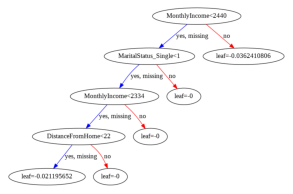

In [81]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

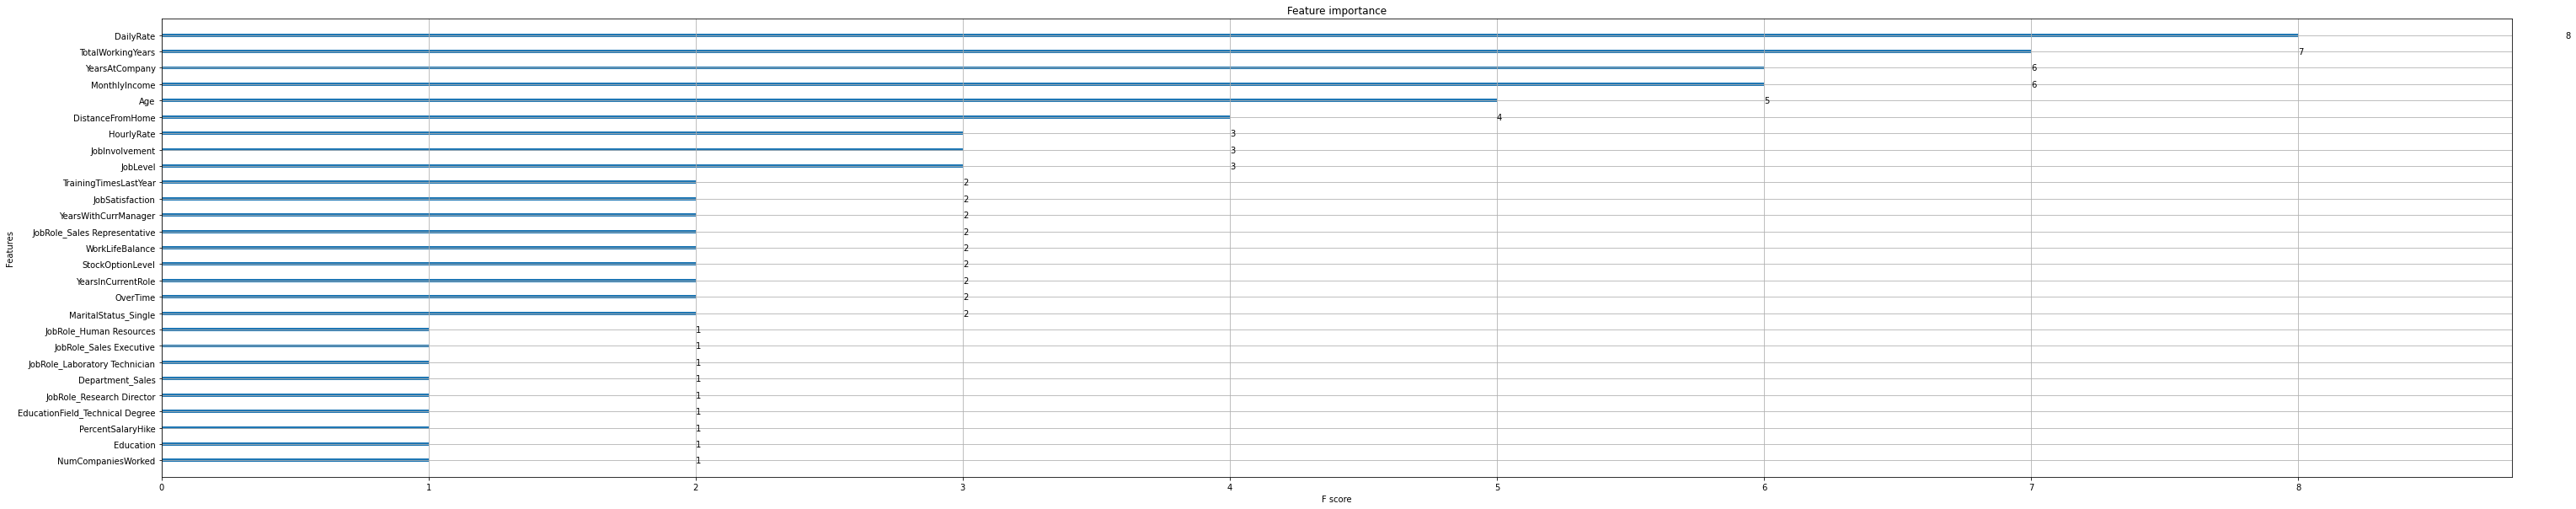

In [82]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# **Lightboost Regressor Model**

In [94]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [83]:
model = LGBMClassifier()

In [86]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

In [89]:
model.fit(x_train,y_train)

lbpreds = model.predict(x_test)

In [92]:
lbrmse = np.sqrt(mean_squared_error(y_test, lbpreds))
print("RMSE: %f" % (lbrmse))

RMSE: 0.416497


In [96]:
lbr2 = r2_score(y_test, lbpreds)
print("R2: %f" % (lbrmse))

R2: 0.416497


# **Catboost Regression Model**